<a href="https://colab.research.google.com/github/Baroka-wp/dive_ML/blob/master/Sprint10_Deep_neuronal_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importer les bibliotheques

import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
#lissage les image
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

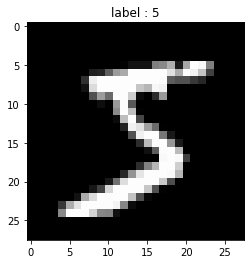

In [11]:
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [5]:
#spliting
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


In [6]:
#normalisation Min Max
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#encodage
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(48000,)
(48000, 10)
float64


## [Problème 1] Classification des couches entièrement connectées

In [ ]:
class FC:
    
     """
    Nombre de noeuds Couche entièrement connectée de n_nodes1 à n_nodes2
    Paramètres
    ----------
    n_nodes1 : int
      Nombre de noeuds dans la couche précédente
    n_nodes2 : int
      Nombre de noeuds dans la couche suivante
    initializer : instance de la méthode d'initialisation
    optimizer : instance de la méthode d'optimisation
    """
    
     def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        
        self.optimizer = optimizer
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)
       
        self.X = None
        self.dZ = None
        
    
     def forward(self, X):
        """
        forward
        Paramètres
        ----------
        X : Les formes suivantes de ndarray, shape (batch_size, n_nodes1)
            入力
        Retourne
        ----------
        A : Les formes suivantes de ndarray, shape (batch_size, n_nodes2)
            sortie
        """        
        self.X = X
        A = X.dot(self.W) + self.B

        return A
    
    
     def backward(self, dA):
        
       """
        Backward
        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward
        """
       self.dZ = np.dot(dA, self.W.T)
       self.dB = np.sum(dA, axis=0)
       self.dW = np.dot(self.X.T, dA)
       self.optimizer.update(self)
          
       return self.dZ

## [Problème 2] Classification de la méthode d'initialisation

In [ ]:
class SimpleInitializer():
    
    """
    Initialisation simple avec une distribution gaussienne
    Paramètres
    ----------
    sigma : float
      Ecart-type de la distribution gaussienne
    """
    
    def __init__(self, sigma=0.01):
        
        self.sigma = sigma
        
        
    def W(self, n_nodes1, n_nodes2):
        
        """
        Initialisation du poids
        Paramètres
        ----------
        n_nodes1 : int
          Nombre de noeuds dans la couche précédente
        n_nodes2 : int
          Nombre de noeuds dans la couche suivante
        Retourne
        ----------
        W :
        """
        
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        
        return W
    
    
    def B(self, n_nodes2):
        
        """
        Initialisation du biais
        
        Paramètres.
        ----------
        n_nodes2 : int
          Nombre de noeuds dans la couche suivante
          
        Renvoie à
        ----------
        B :float
            Valeur initiale du biais
            
        """
        
        B = self.sigma * np.random.randn(n_nodes2)
        
        return B


## [Problème 3] Classification des méthodes d'optimisation


In [ ]:
class SGD:
    """
     Descente de gradient stochastique
    Paramètres
    ----------
    lr : Taux d'apprentissage
    """
    def __init__(self, lr):
        self.lr = lr
    def update(self, layer):
        """
        Mise à jour des poids et des biais pour une couche
        Paramètres
        ----------
        layer : Instance de la couche avant la mise à jour
        """
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB


## [Problem 4] Classifier les fonctions d'activation




In [ ]:
class Tanh:      
  def forward(self, A):
     self.Z = (np.exp(A) - np.exp(-A)) / (np.exp(A) + np.exp(-A))
     
     return self.Z

  def backward(self, dZ):
    dA = dZ*(1 - self.Z)**2
    
    return dA

In [ ]:
class Softmax:
    
    def forward(self, A):
        
        A = A - np.max(A, axis=1, keepdims=True)
        Z = np.exp(A) / np.sum(np.exp(A), axis=1, keepdims=True)
        return Z
        
        
    def backward(self, dZ, Y):
        
        batch_size = dZ.shape[0]
        dA = (dZ - Y) / batch_size
        
        loss = (-1)*np.sum(Y * np.log(dZ + 1e-7))  / batch_size
        
        
        return dA, loss

## [Problem 5] ReLU class creation


In [ ]:
class ReLU:
  def __init__(self):
    self.mask = None
      
  def forward(self, A):
    self.mask = (A <= 0)
    Z = np.maximum(0, A)
    return Z
          
  def backward(self, dA):
    dA[self.mask] = 0
    return dA

## [Problem 6] Initial value of weight

In [ ]:
class XavierInitializer:
    
    def __init__(self, sigma):
        
        self.sigma = sigma
        
            
    def W(self, n_nodes1, n_nodes2):
        self.n_nodes1 = n_nodes1
        self.sigma = 1 / np.sqrt(n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        
        return W
    
    
    def B(self, n_nodes2):
        self.sigma = 1 / np.sqrt(self.n_nodes1)
        B = self.sigma * np.random.randn(n_nodes2)
        
        return B

In [ ]:
class HeInitializer:
    def __init__(self, sigma):
        
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        self.n_nodes1 = n_nodes1
        sigma = np.sqrt(2 / n_nodes1)
        W = sigma * np.random.randn(n_nodes1, n_nodes2)
        
        return W
    
    
    def B(self, n_nodes2):
        
        sigma = np.sqrt(2 / self.n_nodes1)
        B = sigma * np.random.randn(n_nodes2)
        
        return B

## [Problem 7]  Méthode d'optimisation


In [ ]:
class AdaGrad():
    def __init__(self, lr):
        
        self.lr = lr
        self.hW = 1.
        self.hB = 1.
        
    def update(self, layer):
        self.hW += np.mean(layer.dW, axis=0)**2
        self.hB += ((np.mean(layer.dB, axis=0))**2).sum(axis=0)
        
        layer.W -= (self.lr / np.sqrt(self.hW)) * layer.dW
        layer.B -= (self.lr / np.sqrt(self.hB)) * layer.dB

In [ ]:
class GetMiniBatch:
    
    def __init__(self, X, y, batch_size = 20, seed=0):
        
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        
        
    def __len__(self):
        return self._stop
    
    
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]
    
    
    def __iter__(self):
        self._counter = 0
        return self
    
    
    def __next__(self):
        
        if self._counter >= self._stop:
            raise StopIteration()
            
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

## [Problème 8] Achèvement de la classe

In [ ]:
class ScratchDeepNeuralNetrowkClassifier():
   
    def __init__(self, initializer, optimizer, activator1, activator2, lr = 0.001,  batch_size = 20, n_features = 784, n_nodes1 = 400, n_nodes2 = 200, n_output = 10, sigma=0.01, n_epochs=20, verbose = True):
        
        self.verbose = verbose
        
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        
        self.FC1 = None
        self.FC2 = None
        self.FC3 = None
        
        self.initializer = initializer
        self.optimizer = optimizer
        self.lr = lr
        
        self.activator1 = activator1
        self.activator2 = activator2   
        
        self.sigma = sigma
        
        self.loss = None
        self.val_loss = None
        
        self.loss_hist = []
        self.val_loss_hist = []
        
    def forward_and_backward(self, X, y):
        
        Y = np.identity(10)[y]
        
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)

        dA3, self.loss = self.activation3.backward(Z3, Y) 
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1)

    def forward_with_loss(self, X, y):
        
        Y = np.identity(10)[y]
        
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        
        dA3, self.val_loss = self.activation3.backward(Z3, Y) 
        
    
    def fit(self, X, y, X_val=None, y_val=None):
        
        
        
        # Generate all nodes first
        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), self.optimizer(self.lr))
        self.activation1 = self.activator1
    
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), self.optimizer(self.lr))
        self.activation2 = self.activator2
        
        self.FC3 = FC(self.n_nodes2, self.n_output, self.initializer(self.sigma), self.optimizer(self.lr))
        self.activation3 = Softmax()
        # Generate a mini-batch of training data
        get_mini_batch_train = GetMiniBatch(X, y, batch_size=self.batch_size)
        
        get_mini_batch_val = GetMiniBatch(X_val, y_val, batch_size=self.batch_size)
        
        for epoch in tqdm(range(self.n_epochs)):
            
            for mini_X_train, mini_y_train in get_mini_batch_train:
                self.forward_and_backward(mini_X_train, mini_y_train)
                
            self.loss_hist.append(self.loss)
            mini_X_val, mini_y_val = get_mini_batch_val[0]
            self.forward_with_loss(mini_X_val, mini_y_val)
            self.val_loss_hist.append(self.val_loss)
        
            
            if self.verbose:

                print('#'*25)
                print('### Epoch %i'%(epoch+1))
                print('#'*25)
                
                print("Perte de données de formation  : {}".format(self.loss))
                print("Perte des données de validation : {}".format(self.val_loss))
                
                print()
                
                
    
    def predict(self, X):
        
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        
        pred = Z3.argmax(axis=1)
        return pred

## [Problem 9] Learning and estimation


#### Tanh() activation

In [ ]:
dnn = ScratchDeepNeuralNetrowkClassifier(initializer=SimpleInitializer, optimizer = SGD, lr=0.0001,  sigma=0.01, activator1=Tanh(),  activator2=Tanh(), n_epochs=20, verbose = False)
dnn.fit(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
100%|██████████| 20/20 [06:49<00:00, 20.49s/it]


### lost plot

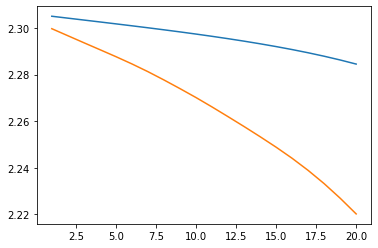

In [ ]:
plt.plot(np.arange(1, dnn.n_epochs+1), dnn.loss_hist)
plt.plot(np.arange(1, dnn.n_epochs+1), dnn.val_loss_hist)

plt.show()


#### prediction

In [ ]:
y_pred = dnn.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 6])

### estimation

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.2327


## ReLU() activation

In [ ]:
#fit
dnnReLU = ScratchDeepNeuralNetrowkClassifier(initializer=HeInitializer,optimizer = SGD, lr=0.0001,  sigma=0.01, activator1=ReLU(), activator2=ReLU(), n_epochs=20, verbose = False)
dnnReLU.fit(X_train, y_train, X_val, y_val)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
100%|██████████| 20/20 [05:34<00:00, 16.71s/it]


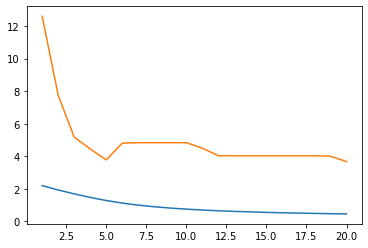

In [ ]:
#plot loss
plt.plot(np.arange(1, dnnReLU.n_epochs+1), dnnReLU.loss_hist)
plt.plot(np.arange(1, dnnReLU.n_epochs+1), dnnReLU.val_loss_hist)

plt.show()

In [ ]:
# prediction
y_predReLU = dnnReLU.predict(X_test)
y_predReLU

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
# accuracy
accuracY = accuracy_score(y_test, y_predReLU)
print(accuracY)

0.8812


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


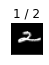

In [ ]:
num = 36 

true_false = y_pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')